<a href="https://colab.research.google.com/github/Shiksha-Yadav/WOC/blob/main/Logistic_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

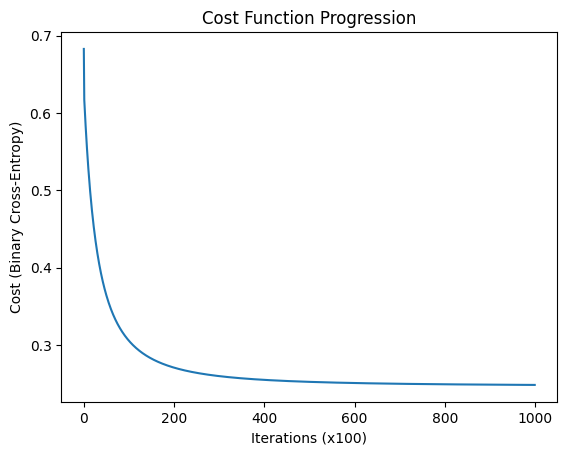

For iterations: 100000
Model accuracy on test set: 93.5%
Final weights: [ -1.03194539  -0.54639992  -0.27162673  -5.83730487  -0.97453027
  24.76165649  -0.76529331  -0.96090694   3.85826637  -0.0766903
  -1.32005892  -0.35717559  -1.2363734    3.03350258   2.68822078
 -11.92606417   9.28028164  -9.27755126  -4.21954761  -0.91879315]
Final bias: -3.3100411016630384
F1 Score on test set: 0.8917042693509197


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# loading the dataset
def data(dataset):
  df= pd.read_csv(dataset)
  return df

# normalization of dataset to ensure equal contribution of each feature
def normalizationx(df, min=None, max=None):
  min = df.min() if min is None else min
  max = df.max() if max is None else max
  norm_df= (df-min)/(max-min)
  return norm_df, min, max

def normalizationy(df, min=None, max=None):
  min = df.min() if min is None else min
  max = df.max() if max is None else max
  norm_df= (df-min)/(max-min)
  return norm_df, min, max

# denormalize to get values for test dataset
def denorm(normal_df, max, min):
  return (normal_df*(max-min) + min)

# separate training and testing data
def matrix(df):
  x= df.iloc[1:,1:-1].values # all columns (features) except the last one (target)
  y= df.iloc[1:, -1].values # last column (target)
  test_size= 0.2
  rows = x.shape[0]
  train_size = int(rows * (1 - test_size))
  x_train = x[:train_size]   # First 80% for training
  x_test = x[train_size:]    # Remaining 20% for testing
  y_train = y[:train_size]   # First 80% of target for training
  y_test = y[train_size:]    # Remaining 20% of target for testing
  return x_train, x_test, y_train, y_test

def sigmoid(z):
  sig= 1/(1+ np.exp(-z))
  return sig

def compute_cost(x, y, wt, bias):
  m = len(y)
  predictions = sigmoid(np.dot(x, wt) + bias)
  cost = -(1/m) * np.sum(y * np.log(predictions) + (1 - y) * np.log(1 - predictions))
  return cost

def gradient_descent(x, y, weights, bias, learning_rate, iterations):
  m = len(y)
  cost_history = []
  for i in range(iterations):
    predictions = sigmoid(np.dot(x, weights) + bias)
    dw = (1/m) * np.dot(x.T, (predictions - y))
    db = (1/m) * np.sum(predictions - y)
    weights -= learning_rate * dw
    bias -= learning_rate * db
    if i % 100 == 0:
      cost = compute_cost(x, y, weights, bias)
      cost_history.append(cost)
  return weights, bias, cost_history

def predict(x, wt, bias):
  predictions= sigmoid(np.dot(x, wt)+ bias)
  return (predictions >= 0.5).astype(int)

def f1_score(y_true, y_pred):
  TP = np.sum((y_true == 1) & (y_pred == 1))
  FP = np.sum((y_true == 0) & (y_pred == 1))
  FN = np.sum((y_true == 1) & (y_pred == 0))
  precision = TP / (TP + FP) if (TP + FP) != 0 else 0
  recall = TP / (TP + FN) if (TP + FN) != 0 else 0
  f1 = 2 * (precision * recall) / (precision + recall) if (precision + recall) != 0 else 0
  return f1

def plot_cost(costs):
  plt.plot(costs)
  plt.xlabel("Iterations (x100)")
  plt.ylabel("Cost (Binary Cross-Entropy)")
  plt.title("Cost Function Progression")
  plt.show()

# Visualize the predictions against true values
def plot_predictions(y_true, y_pred, title="True vs Predicted"):
  plt.scatter(y_true, y_pred, color='blue', label='Predictions')  # Scatter plot of true vs predicted
  plt.plot([0, 1], [0, 1], color='red', label='Ideal Line')  # Ideal line (y=x)
  plt.xlabel('True Values')
  plt.ylabel('Predicted Values')
  plt.title(title)
  plt.legend()
  plt.show()

if __name__ == "__main__":
  dataset = "binary_classification_train.csv"
  df1= data(dataset) # dataset
  x_train, x_test, y_train, y_test= matrix(df1)
  x_train_norm, min_x, max_x= normalizationx(x_train)
  x_test_norm, _, _= normalizationx(x_test, min_x, max_x)
  #y_train_norm, min_y, max_y= normalizationy(y_train)
  #y_test_norm, _, _= normalizationy(y_test, min_y, max_y)
  weights_initial= np.zeros(x_train_norm.shape[1])
  bias= 0
  learning_rate=0.1
  iterations=100000
  weights, bias, costs = gradient_descent(x_train_norm, y_train, weights_initial, bias, learning_rate, iterations)
  plot_cost(costs)
  y_pred_train = predict(x_train_norm, weights, bias)
  y_pred_test = predict(x_test_norm, weights, bias)
  #y_pred_test_denorm = denorm(y_pred_test, max_y, min_y)
  #y_test_denorm = denorm(y_test_norm, max_y, min_y)
  print(f"For iterations: {iterations}")
  accuracy = np.mean(y_pred_test == y_test) * 100
  print(f"Model accuracy on test set: {accuracy}%")
  #plot_predictions(y_test, y_pred_test, title="Test Set: True vs Predicted Values")
  print(f"Final weights: {weights}")
  print(f"Final bias: {bias}")
  print(f"F1 Score on test set: {f1_score(y_test, y_pred_test)}")


In [ ]:
df_testdataset= data('binary_classification_test.csv')
test_ = df_testdataset.iloc[1:,1:].values
#x_test1, _, _=normalizationx(test_, min_x, max_x)
y_predict_test = predict(test_, weights, bias)
#y_test_denormed = denorm(y_predict_test, max_y, min_y)
print(y_predict_test)

[1 0 0 ... 1 1 0]


<ipython-input-3-416cd60b6202>:41: RuntimeWarning: overflow encountered in exp
  sig= 1/(1+ np.exp(-z))
